### 1️⃣ Introduction — DBSCAN 🌌

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** is an **unsupervised clustering algorithm** that groups data points based on **density**.  

- **Goal:** find dense regions (clusters) and separate sparse regions (noise/outliers).  
- **Type:** Density-based clustering.  
- **Applications:** anomaly detection, geospatial clustering, customer behavior analysis.

Key characteristics:
- Detects **arbitrary-shaped clusters**.  
- Identifies **noise points** automatically.  
- Does **not require specifying number of clusters** beforehand.


### 2️⃣ Key Concepts & Parameters ✏️

1. **eps (ε):** neighborhood radius around a point.  
2. **min_samples:** minimum number of points in ε-neighborhood to form a dense region (core point).  

**Point Types:**
- **Core point:** ≥ min_samples in its ε-neighborhood.  
- **Border point:** < min_samples, but in the neighborhood of a core point.  
- **Noise point:** neither core nor border (outlier).  

**Clustering rules:**
1. Start with an unvisited point.  
2. If it’s a core point, create a cluster and recursively include all density-reachable points.  
3. Repeat for all unvisited points.


### 3️⃣ Distance Equation & Density Reachability 🔢

**Euclidean distance** is commonly used:

$$
d(x_i, x_j) = \sqrt{\sum_{k=1}^{n} (x_{ik} - x_{jk})^2}
$$

**Density reachability:** point $p$ is **density-reachable** from $q$ if:

$$
\|p - q\| \le \epsilon \quad \text{and $q$ is a core point}
$$

**Density-connected:** two points $p$ and $q$ are density-connected if there exists a point $o$ such that both are density-reachable from $o$.


### 4️⃣ Step-by-Step Algorithm 🧩

1. Mark all points as unvisited.  
2. For each unvisited point \(P\):  
   a. Find its ε-neighborhood.  
   b. If number of points ≥ min_samples → **core point**, create a cluster.  
   c. Recursively add all density-reachable points.  
3. Points not assigned to any cluster are **noise**.  
4. Repeat until all points are visited.

**Advantages:**  
- Finds clusters of arbitrary shape.  
- Automatically detects outliers.  

**Limitations:**  
- Sensitive to **eps** and **min_samples**.  
- Not ideal for varying density clusters.


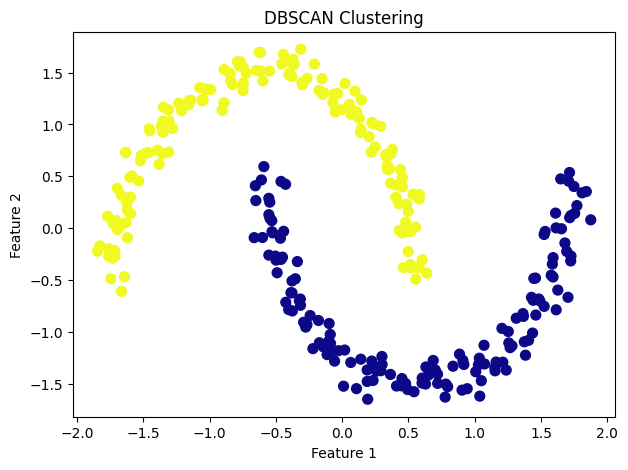

In [1]:
### 5️⃣ DBSCAN Implementation — Example
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Generate synthetic dataset (moons shape)
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

# Fit DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_dbscan, cmap='plasma', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### 6️⃣ Interpreting DBSCAN Output 🔎

- **Labels:**  
  - Clustered points → non-negative integers (0, 1, 2…)  
  - Noise points → -1  

- In the plot, clusters are colored differently; noise points are usually a separate color.  

- **Key hyperparameters:**  
  - `eps`: too small → many points labeled as noise; too large → clusters merge.  
  - `min_samples`: higher → more points considered noise.


In [2]:
### 7️⃣ Identifying Noise Points
noise_points = X_scaled[y_dbscan == -1]

print("Number of noise points:", len(noise_points))


Number of noise points: 0


### 8️⃣ Choosing Hyperparameters (eps & min_samples) ⚡

1. **min_samples:**  
   - Rule of thumb: `min_samples = 2 * number_of_features`.  

2. **eps:**  
   - Use **k-distance graph**: plot distance to k-th nearest neighbor (k = min_samples).  
   - Look for **“knee” point** → choose as eps.

$$
\text{Distance}(x_i) = \text{distance to k-th nearest neighbor of } x_i
$$


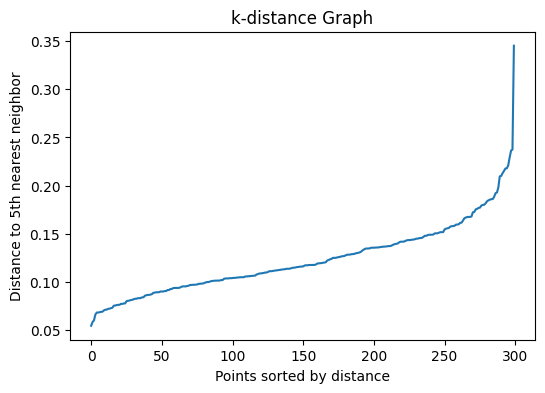

In [3]:
### 9️⃣ k-distance Graph for eps selection
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:,4])  # 4 = min_samples - 1

plt.figure(figsize=(6,4))
plt.plot(distances)
plt.title('k-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 5th nearest neighbor')
plt.show()


### 🔟 Advantages, Limitations & Use Cases ✅

**Advantages:**
- Detects **arbitrary-shaped clusters**.  
- Automatically finds **outliers/noise**.  
- No need to predefine the number of clusters.  

**Limitations:**
- Sensitive to `eps` and `min_samples`.  
- Struggles with clusters of varying densities.  
- Not ideal for very high-dimensional data.  

**Best Use Cases:**
- Spatial clustering (e.g., GPS points).  
- Anomaly detection.  
- Non-globular clusters.
